## Import MCMC model

In [1]:
__version__ = "0.1"
__date__    = "2022-08-03"

import numpy as np
import scipy.stats as st
from sklearn import metrics

import numpy as np
import scipy.stats as st
from sklearn import metrics

class FitfuncDev:
    r"""
        Offers a selection of fitting function for GalacticSim
    """
    global g_gssmap, g_orimap, g_cl, g_l
    
    def __init__( self, tol=0.0001 , multi_=False, size=1000 ):
        self.multi_ = multi_        # Using multiple maps
        self.tol = tol              # Tolerance of accuracy
        self.size = size            # Size of the input image
    
    def diff( self, x ):
        r"""
        *** Print the stat difference ***
        """
        if self.multi_:
            for i in g_gssmap:
                ssmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1]
                newmap = ssmap + g_orimap[i]
                orimean = np.mean( g_orimap[i] )
                orivar = np.var( g_orimap[i] )
                oriskew = st.skew( g_orimap[i] )
                orikurt = st.kurtosis( g_orimap[i] )
                
                print( 'Map patch: [%s]' % i )
                print( '========Mean========' )
                print( 'ssmap:', np.mean(ssmap) )
                print( 'newmap', np.mean(newmap) )
                print( 'orimap', orimean )
                print( 'Mean_diff', np.mean(newmap)-orimean )
                print( 'Mean_Tol', self.tol, orimean*self.tol )

                print( '========Var========' )
                print( 'ssmap:', np.var(ssmap) )
                print( 'newmap', np.var(newmap) )
                print( 'orimap', orivar )
                print( 'Var_diff', np.var(newmap)-orivar ) 
                print( 'Var_Tol', self.tol, orivar*self.tol )

                print( '========Skew========' )
                print( 'ssmap:', st.skew(ssmap) )
                print( 'newmap', st.skew(newmap) )
                print( 'orimap', oriskew )
                print( 'Skew_diff', st.skew(newmap)-oriskew )
                print( 'Skew_Tol', self.tol, oriskew*self.tol )

                print( '========Kurt========' )
                print( 'ssmap:', st.kurtosis(ssmap) )
                print( 'newmap', st.kurtosis(newmap) )
                print( 'orimap', orikurt )
                print( 'Kurt_diff', st.kurtosis(newmap)-orikurt )
                print( 'Kurt_Tol', self.tol, oriskew*self.tol )
                plt.hist( orimap, alpha=0.3, color='c', edgecolor='k' )
                plt.hist( newmap, alpha=0.3 )
            
        else:
            ssmap = x[0] * g_gssmap * g_orimap ** x[1]
            newmap = ssmap + g_orimap
            orimean = np.mean( g_orimap )
            orivar = np.var( g_orimap )
            oriskew = st.skew( g_orimap )
            orikurt = st.kurtosis( g_orimap )
            
            print( '========Mean========' )
            print( 'ssmap:', np.mean(ssmap) )
            print( 'newmap', np.mean(newmap) )
            print( 'orimap', orimean)
            print( 'Mean_diff', np.mean(newmap)-orimean )
            print( 'Mean_Tol', self.tol, orimean*self.tol )
            
            print( '========Var========' )
            print( 'ssmap:', np.var(ssmap) )
            print( 'newmap', np.var(newmap) )
            print( 'orimap', orivar )
            print( 'Var_diff', np.var(newmap)-orivar ) 
            print( 'Var_Tol', self.tol, orivar*self.tol )
            
            print( '========Skew========' )
            print( 'ssmap:', st.skew(ssmap) )
            print( 'newmap', st.skew(newmap) )
            print( 'orimap', oriskew )
            print( 'Skew_diff', st.skew(newmap)-oriskew )
            print( 'Skew_Tol', self.tol, oriskew*self.tol )
            
            print( '========Kurt========' )
            print( 'ssmap:', st.kurtosis(ssmap) )
            print( 'newmap', st.kurtosis(newmap) )
            print( 'orimap', orikurt )
            print( 'Kurt_diff', st.kurtosis(newmap)-orikurt )
            print( 'Kurt_Tol', self.tol, oriskew*self.tol )
            plt.hist( orimap, alpha=0.3, color='c', edgecolor='k' )
            plt.hist( newmap, alpha=0.3 )

    # ================= Cl Model =================
    
    def cl_likelihood( self, x ):
        r"""
        *** Linear relation of the Angular power spectrum in the log-log space ***
        """
        model = x[0] * np.log10( g_l ) + x[1]
        return -0.5 * np.sum( ( np.log10( g_cl ) - model ) ** 2 )
    

    def plot_cl( self, x, lmin, lmax ):
        r"""
        *** Plot the Cl-l function function in the log-log space ***
        """
        lower = np.log10( lmin ) - 0.2
        upper = np.log10( lmax ) + 0.2
        xfid = np.linspace( lower, upper )
        plt.plot( np.log10( g_l ), np.log10( g_cl ), c='coral' )
        plt.plot( xfid, x[0]*xfid + x[1], c='c', linestyle=':' )
        plt.xlabel( 'Log(l)' )
        plt.ylabel( 'Log(Cl)' )
        plt.show()
    
    
    def fitcl( self, lmin, lmax ):
        r"""
        *** Linear regression of Cl-l function in the log-log space w/ plot overview ***
        """
        lower = np.log10( lmin ) - 0.2
        upper = np.log10( lmax ) + 0.2
        xfid = np.linspace( lower, upper )
        slope, intercept, r_value, p_value, std_err = linregress(np.log10( g_l ), np.log10( g_cl ))
        plt.plot( np.log10( g_l ), np.log10( g_cl ), c='coral' )
        plt.plot( xfid, xfid*slope+intercept, c='darkolivegreen', linestyle='--' )
        plt.xlabel( 'Log(l)' )
        plt.ylabel( 'Log(Cl)' )
        plt.show()
        return slope, intercept, r_value, p_value, std_err
    
    # ================= Model =================
    
    def full( self, x ):
        r"""
        *** Using the full stat difference [ mean, variance, skewness, kurtosis ] ***
        """
        if self.multi_:
            stat = []
            for i in g_gssmap:
                newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                s = ( np.mean( newmap ) - np.mean( g_orimap[i] ) ) **2 + \
                     np.sqrt( ( np.var( newmap ) - np.var( g_orimap[i] ) ) **2 ) + \
                     ( st.skew( newmap ) - st.skew( g_orimap[i] ) ) **2 + \
                     ( st.kurtosis( newmap ) - st.kurtosis( g_orimap[i] ) )**2
                stat.append( s )
            stat = sum( stat )
        else:
            newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
            stat = ( np.mean( newmap ) - np.mean( g_orimap ) ) **2 + \
                    np.sqrt( ( np.var( newmap ) - np.var( g_orimap ) ) **2 ) + \
                    ( st.skew( newmap ) - st.skew( g_orimap ) ) **2  + \
                    (st.kurtosis( newmap ) - st.kurtosis( g_orimap ))**2
        return - 0.25 * stat
    
    
    def single( self, x, type_='m' ):
        r"""
        *** Using the one of the stat difference [ mean, variance, skewness, kurtosis ] ***
        type_ = 'mean', 'var', 'skew', 'kurt' or 'm', 'v', 's', 'k'
        """
        if type_ in { 'mean', 'var', 'skew', 'kurt', 'm', 'v', 's', 'k' }:
            if type_ in { 'mean', 'm' }:
                if self.multi_:
                    stat = []
                    for i in g_gssmap:
                        newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                        s = ( np.mean( newmap ) - np.mean( g_orimap[i] ) ) **2
                        stat.append( s )
                    stat = sum( stat )
                else:
                    newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
                    stat = ( np.mean( newmap ) - np.mean( g_orimap ) ) **2
            elif type_ in { 'var', 'v' }:
                if self.multi_:
                    stat = []
                    for i in g_gssmap:
                        newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                        s =  ( np.var( newmap ) - np.var( g_orimap[i] ) ) **2 
                        stat.append( s )
                    stat = sum( stat )
                else:
                    newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
                    stat = ( np.var( newmap ) - np.var( g_orimap ) ) **2
            elif type_ in { 'skew', 's' }:
                if self.multi_:
                    stat = []
                    for i in g_gssmap:
                        newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                        s = ( st.skew( newmap ) - st.skew( g_orimap[i] ) ) **2
                        stat.append( s )
                    stat = sum( stat )
                else:
                    newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
                    stat = ( st.skew( newmap ) - st.skew( g_orimap ) ) **2
            elif type_ in { 'kurt', 'k' }:
                if self.multi_:
                    stat = []
                    for i in g_gssmap:
                        newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                        s = ( st.kurtosis( newmap ) - st.kurtosis( g_orimap[i] ) )**2
                        stat.append( s )
                    stat = sum( stat )
                else:
                    newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
                    stat = (st.kurtosis( newmap ) - st.kurtosis( g_orimap ))**2
            return - stat
    
    
    def com_full_tost( self, x ):
        r"""
        A combined model using full stat difference [ mean, variance, skewness, kurtosis ], MMD, & TOST;
        TOST is using for set the tolerance;
        """
        if self.multi_:
            stat = []
            
            for i in g_gssmap:
                ssmap = x[0] * g_orimap[i] * g_orimap[i] ** x[1]
                newmap = ssmap + g_orimap[i]
                # The TOST Test
                mean = np.mean(g_orimap[i])
                low = -mean * self.tol
                upp = mean * self.tol
                t1, pv1 = st.ttest_1samp( ssmap, low, alternative='greater' )
                t2, pv2 = st.ttest_1samp( ssmap, upp, alternative='less' )
                p = max(pv1/2, pv2/2)
                tost = 1 - p

                if p > 0.005:
                    diff_p = 1000000000
                else:
                    diff_p = 0

                # Full stats
                diff_mean = ( np.mean( newmap ) - np.mean( g_orimap[i] ) ) ** 2
                diff_var = ( np.var( newmap ) - np.var( g_orimap[i] ) ) ** 2
                diff_skew = ( st.skew( newmap ) - st.skew( g_orimap[i] ) ) ** 2
                diff_kurt = (st.kurtosis( newmap ) - st.kurtosis( g_orimap[i] ) ) ** 2
            
                s = diff_mean + diff_var + diff_skew + diff_kurt + diff_p
                stat.append( s )
                
            stat = sum( stat )
        else:
            ssmap = x[0] * g_gssmap * g_orimap ** x[1]
            newmap = ssmap + g_orimap
            # The TOST Test
            mean = np.mean(g_orimap)
            low = -mean * self.tol
            upp = mean * self.tol
            t1, pv1 = st.ttest_1samp( ssmap, low, alternative='greater' )
            t2, pv2 = st.ttest_1samp( ssmap, upp, alternative='less' )
            p = max(pv1/2, pv2/2)
            tost = 1 - p
            
            if p > 0.005:
                diff_p = 1000000000
            else:
                diff_p = 0
            
            # Full stats
            diff_mean = ( np.mean( newmap ) - np.mean( g_orimap ) ) ** 2
            diff_var = ( np.var( newmap ) - np.var( g_orimap ) ) ** 2
            diff_skew = ( st.skew( newmap ) - st.skew( g_orimap ) ) ** 2
            diff_kurt = (st.kurtosis( newmap ) - st.kurtosis( g_orimap ) ) ** 2
            
            stat = diff_mean + diff_var + diff_skew + diff_kurt + diff_p
            
        return - 0.25 * stat
    
    
    def combine( self, x ):
        r"""
        A combined model using full stat difference [ mean, variance, skewness, kurtosis ], MMD, & TOST;
        TOST is using for set the tolerance;
        """
        if self.multi_:
            stat = []
            
            for i in g_gssmap:
                ssmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1]
                newmap = ssmap + g_orimap[i]
                # The TOST Test
                mean = np.mean(g_orimap[i])
                low = -mean * self.tol
                upp = mean * self.tol
                t1, pv1 = st.ttest_1samp( ssmap, low, alternative='greater' )
                t2, pv2 = st.ttest_1samp( ssmap, upp, alternative='less' )
                p = max(pv1/2, pv2/2)
                tost = 1 - p

                if p > 0.005:
                    diff_p = 1000000000
                else:
                    diff_p = 0

                # MMD
                ori_vector = g_orimap[i].copy()
                ori_vector = ori_vector.reshape( self.size, self.size )
                new_vector = newmap.copy()
                new_vector = new_vector.reshape( self.size, self.size )
                mml = self.mmd_linear( new_vector, ori_vector )

                # Full stats
                diff_mean = ( np.mean( newmap ) - np.mean( g_orimap[i] ) ) ** 2
                diff_var = np.sqrt( ( np.var( newmap ) - np.var( g_orimap[i] ) ) ** 2 )
                diff_skew = np.cbrt( ( st.skew( newmap ) - st.skew( g_orimap[i] ) ) ** 2 )
                diff_kurt = np.sqrt( np.sqrt( (st.kurtosis( newmap ) - st.kurtosis( g_orimap[i] ) ) ** 2 ) )
            
                s = ( diff_mean + mml ) / 2 + diff_var + diff_skew + diff_kurt + diff_p
                stat.append( s )
                
            stat = sum( stat )
        else:
            ssmap = x[0] * g_gssmap * g_orimap ** x[1]
            newmap = ssmap + g_orimap
            # The TOST Test
            mean = np.mean(g_orimap)
            low = -mean * self.tol
            upp = mean * self.tol
            t1, pv1 = st.ttest_1samp( ssmap, low, alternative='greater' )
            t2, pv2 = st.ttest_1samp( ssmap, upp, alternative='less' )
            p = max(pv1/2, pv2/2)
            tost = 1 - p
            
            if p > 0.005:
                diff_p = 1000000000
            else:
                diff_p = 0
            
            # MMD
            ori_vector = g_orimap.copy()
            ori_vector = ori_vector.reshape( self.size, self.size )
            new_vector = newmap.copy()
            new_vector = new_vector.reshape( self.size, self.size )
            mml = self.mmd_linear( new_vector, ori_vector )
            
            # Full stats
            diff_mean = ( np.mean( newmap ) - np.mean( g_orimap ) ) ** 2
            diff_var = np.sqrt( ( np.var( newmap ) - np.var( g_orimap ) ) ** 2 )
            diff_skew = np.cbrt( ( st.skew( newmap ) - st.skew( g_orimap ) ) ** 2 )
            diff_kurt = np.sqrt( np.sqrt( ( st.kurtosis( newmap ) - st.kurtosis( g_orimap ) ) ** 2 ) )
            
            stat = ( diff_mean + mml ) / 2 + diff_var + diff_skew + diff_kurt + diff_p
            
        return - 0.25 * stat
    
    
    # ================= MMD =================
    
    def MMD( self, x, shape=500 ):
        r"""
        *** Calculate the maximum mean discrepancy ***
        """
        ssmap = x[0] * g_gssmap * g_orimap ** x[1]
        newmap = ssmap + g_orimap
        ori_vector = g_orimap.copy()
        ori_vector = ori_vector.reshape( shape[0],shape[1] )
        new_vector = newmap.copy()
        new_vector = new_vector.reshape( shape[0],shape[1] )

        mml = self.mmd_linear( new_vector, ori_vector )
        mmg = self.mmd_rbf( new_vector, ori_vector )

        return mml, mmg
    
    
    def mmd_linear( self, X, Y ):
        r"""MMD using linear kernel (i.e., k(x,y) = <x,y>)
        Note that this is not the original linear MMD, only the reformulated and faster version.
        The original version is:
            def mmd_linear(X, Y):
                XX = np.dot(X, X.T)
                YY = np.dot(Y, Y.T)
                XY = np.dot(X, Y.T)
                return XX.mean() + YY.mean() - 2 * XY.mean()
        Arguments:
            X {[n_sample1, dim]} -- [X matrix]
            Y {[n_sample2, dim]} -- [Y matrix]
        Returns:
            [scalar] -- [MMD value]
        """
        delta = X.mean(0) - Y.mean(0)
        return delta.dot(delta.T)


    def mmd_rbf( self, X, Y, gamma=1.0):
        r"""MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
        Arguments:
            X {[n_sample1, dim]} -- [X matrix]
            Y {[n_sample2, dim]} -- [Y matrix]
        Keyword Arguments:
            gamma {float} -- [kernel parameter] (default: {1.0})
        Returns:
            [scalar] -- [MMD value]
        """
        XX = metrics.pairwise.rbf_kernel(X, X, gamma)
        YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
        XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
        return XX.mean() + YY.mean() - 2 * XY.mean()


    def mmd_poly( self, X, Y, degree=2, gamma=1, coef0=0 ):
        r"""MMD using polynomial kernel (i.e., k(x,y) = (gamma <X, Y> + coef0)^degree)
        Arguments:
            X {[n_sample1, dim]} -- [X matrix]
            Y {[n_sample2, dim]} -- [Y matrix]
        Keyword Arguments:
            degree {int} -- [degree] (default: {2})
            gamma {int} -- [gamma] (default: {1})
            coef0 {int} -- [constant item] (default: {0})
        Returns:
            [scalar] -- [MMD value]
        """
        XX = metrics.pairwise.polynomial_kernel(X, X, degree, gamma, coef0)
        YY = metrics.pairwise.polynomial_kernel(Y, Y, degree, gamma, coef0)
        XY = metrics.pairwise.polynomial_kernel(X, Y, degree, gamma, coef0)
        return XX.mean() + YY.mean() - 2 * XY.mean()
    
    # ================= Stat Tests =================
    
    def Ttest( self, x ):
        r"""
        a.k.a Wilcoxon signed-rank Test >> Mean Test for ND
        Uses the non-param wilcoxon test from Scipy
        """
        if self.multi_:
            tt = []
            for i in g_gssmap:
                newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                t = st.wilcoxon(newmap, g_orimap[i], mode = 'approx')
                tt.append(t)
        else:
            newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
            tt = st.wilcoxon(newmap, g_orimap, mode = 'approx')
        return tt
    
    
    def TOSTest( self, x ):
        r"""
        *** Equivalence test, test if two mean difference are within the tolerance range! ***
        """
        if self.multi_:
            tost = []
            for i in g_gssmap:
                ssmap = x[0] * g_gssmap * g_orimap ** x[1]
                mean = np.mean(g_orimap)

                # The TOST Test
                low = -mean * self.tol
                upp = mean * self.tol
                t1, pv1 = st.ttest_1samp( ssmap, low, alternative='greater' )
                t2, pv2 = st.ttest_1samp( ssmap, upp, alternative='less' )
                p = max(pv1/2, pv2/2)
                t = 1 - p
            tost.append(t)
        else:
            ssmap = x[0] * g_gssmap * g_orimap ** x[1]
            mean = np.mean(g_orimap)

            # The TOST Test
            low = -mean * self.tol
            upp = mean * self.tol
            t1, pv1 = st.ttest_1samp( ssmap, low, alternative='greater' )
            t2, pv2 = st.ttest_1samp( ssmap, upp, alternative='less' )
            p = max(pv1/2, pv2/2)
            tost = 1 - p
        return tost
    
    
    def Ftest( self, x ):
        r"""
        a.k.a Variance Test
        Uses the non-param ansari test from Scipy
        The high-res map & low-res map are considered as independent obs from
        a high-res telescope & a low-res telescope
        """    
        if self.multi_:
            aa = []
            for i in g_gssmap:
                newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                a = st.ansari(newmap,  g_orimap[i])
                aa.append( a )
        else:
            newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
            aa = st.ansari( newmap, g_orimap )
        return aa
    

    def EStest( self, x ):
        r"""
        Uses the non-param epps_singleton_2samp test from Scipy
        The high-res map & low-res map are considered as independent obs from
        a high-res telescope & a low-res telescope
        """
        if self.multi_:
            ee = []
            for i in g_gssmap:
                newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                e = st.epps_singleton_2samp( newmap, g_orimap[i] )
                ee.append( e )
        else:
            newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
            ee = st.epps_singleton_2samp( newmap, g_orimap )
        return ee

    
    def KStest( self, x ):
        r"""
        Uses the non-param Kolmogorov-Smirnov test from Scipy
        The high-res map & low-res map are considered as independent obs from
        a high-res telescope & a low-res telescope
        """
        if self.multi_:
            kk = []
            for i in g_gssmap:
                newmap = x[0] * g_gssmap[i] * g_orimap[i] ** x[1] + g_orimap[i]
                k = st.ks_2samp( newmap, g_orimap[i] )
                kk.append( k )
        else:
            newmap = x[0] * g_gssmap * g_orimap ** x[1] + g_orimap
            kk = st.ks_2samp( newmap, g_orimap )
        return kk

## Set-up

In [2]:
import joblib
import timeit

def savedata( name, obj ):
    tic=timeit.default_timer()
    with open( name,'wb' ) as Gv:
        joblib.dump( obj, Gv)
    toc=timeit.default_timer()
    print(toc - tic)
    
def loaddata( name ):
    tic=timeit.default_timer()
    with open( name,'rb' ) as Gv:
        mydata = joblib.load( Gv)
    toc=timeit.default_timer()
    print(toc - tic)
    return mydata

def load_Gfree_fitmap():
    Gfree_FoV2_fitmap = loaddata('Gfree_44_23_FoV2_fitmap.db')
    Gfree_FoV4_fitmap = loaddata('Gfree_44_23_FoV4_fitmap.db')
    return Gfree_FoV4_fitmap, Gfree_FoV2_fitmap
    
def load_Gsync_fitmap():
    Gsync_FoV2_fitmap = loaddata('Gsync_44_23_FoV2_fitmap.db')
    Gsync_FoV4_fitmap = loaddata('Gsync_44_23_FoV4_fitmap.db')
    return Gsync_FoV4_fitmap, Gsync_FoV2_fitmap

def load_Gfree_simmap():
    Fov4patch_map = loaddata('Gfree_44_23_FoV4_simmap.db')
    Fov4patch_gss = loaddata('Gfree_44_23_FoV4_simgss.db')
    Fov2patch_map = loaddata('Gfree_44_23_FoV2_simmap.db')
    Fov2patch_gss = loaddata('Gfree_44_23_FoV2_simgss.db')
    return Fov4patch_map, Fov4patch_gss, Fov2patch_map, Fov2patch_gss

def load_Gsync_simmap():
    Fov4patch_map = loaddata('Gsync_44_23_FoV4_simmap.db')
    Fov4patch_gss = loaddata('Gsync_44_23_FoV4_simgss.db')
    Fov4patch_id = loaddata('Gsync_44_23_FoV4_simid.db')
    Fov2patch_map = loaddata('Gsync_44_23_FoV2_simmap.db')
    Fov2patch_gss = loaddata('Gsync_44_23_FoV2_simgss.db')
    Fov2patch_id = loaddata('Gsync_44_23_FoV2_simid.db')
    return Fov4patch_map, Fov4patch_gss, Fov4patch_id, Fov2patch_map, Fov2patch_gss, Fov2patch_id

In [3]:
import pickle
import timeit
from MCMC import MCMC
%matplotlib inline

In [4]:
from GalacticDev import GalacticDev

In [5]:
Sfov4 = GalacticDev( comp='Gsync', nside=32768, grfpatch=False, extra_large_mode=True, center = (44,-23), fov = ( 4, 4 ), sim_pixel = 2, default=True)

2022-08-13 13:31:41,411 : createlog : INFO : Log Header >> Action Time : Fuction or method: level : Message
2022-08-13 13:31:41,411 : createlog : INFO : Log standard output streaming is False
2022-08-13 13:31:41,412 : createlog : INFO : GSim_Gsync_Default_True_08_13_2022_133141.log log file is created
2022-08-13 13:31:41,412 : createlog : INFO : Log is created by cxshan
2022-08-13 13:31:41,413 : createlog : INFO : Log level is debug
2022-08-13 13:31:41,414 : __init__ : INFO :  ⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇ 
2022-08-13 13:31:41,414 : __init__ : INFO :  Galactic Gsync simulation is initializing! 
2022-08-13 13:31:41,415 : __init__ : WARNING :  sigma_tem default unit is [arcmin]! 
2022-08-13 13:31:41,415 : _set_comp : INFO : compID is galactic/synchrotron, name is Galactic synchrotron (unpolarized)
2022-08-13 13:31:41,416 : _set_default_io : INFO : Default IO is set. Output dir is /home/cxshan/data/fg21sim+/GalacticSimData/, clobber is True.
2022-08-13 13:31:41,417 : _set_default_params : INFO :  

 Please update the healpix maps when you need to. 


In [6]:
Sfov2 = GalacticDev( comp='Gsync', nside=32768, grfpatch=False, extra_large_mode=True, center = (44,-23), fov = ( 2, 2 ), sim_pixel = 2, default=True )

2022-08-13 13:31:55,281 : createlog : INFO : Log Header >> Action Time : Fuction or method: level : Message
2022-08-13 13:31:55,282 : createlog : INFO : Log standard output streaming is False
2022-08-13 13:31:55,282 : createlog : INFO : GSim_Gsync_Default_True_08_13_2022_133155.log log file is created
2022-08-13 13:31:55,283 : createlog : INFO : Log is created by cxshan
2022-08-13 13:31:55,283 : createlog : INFO : Log level is debug
2022-08-13 13:31:55,284 : __init__ : INFO :  ⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇ 
2022-08-13 13:31:55,284 : __init__ : INFO :  Galactic Gsync simulation is initializing! 
2022-08-13 13:31:55,285 : __init__ : WARNING :  sigma_tem default unit is [arcmin]! 
2022-08-13 13:31:55,286 : _set_comp : INFO : compID is galactic/synchrotron, name is Galactic synchrotron (unpolarized)
2022-08-13 13:31:55,286 : _set_default_io : INFO : Default IO is set. Output dir is /home/cxshan/data/fg21sim+/GalacticSimData/, clobber is True.
2022-08-13 13:31:55,287 : _set_default_params : INFO :  

 Please update the healpix maps when you need to. 


### FoV2 fitting

In [7]:
F = Sfov2

#### Load Data

In [8]:
SF4, SF2 = load_Gsync_fitmap()

0.22000910202041268
0.9011692949570715


In [9]:
g_gssmap = SF2['gss'].flatten()
g_gssmap = F.whiten(g_gssmap)
g_gssmap = g_gssmap.astype(np.float32)
g_orimap = SF2['ori'].flatten()
g_orimap = g_orimap.astype(np.float32)

In [10]:
np.mean(g_gssmap)

6.7752213e-09

In [11]:
F.checknan(g_gssmap)

False

In [12]:
np.mean(g_orimap)

15.429538

In [13]:
F.checknan(g_orimap)

False

#### Load Model

In [8]:
nc=20
nsteps=20000
nwalkers, ndim = 10, 2
param_len, param_num = 1, 2
np.random.seed(42)
initial_params_map = np.array([0.0599, 0.782]) + 1e-3 * np.random.randn(nwalkers, ndim)
param_lim_map = ( (0, 2), (0, 2) )

IP = True
namemap = F.type_ + '_map_fitting_' + str( F.nside ) + '_partial_' + str(F.fov[0]) + '_center_' + str(F.center[0]) + \
        str(F.center[1]) + '_nstep' + str( nsteps ) + '_IP_' + str(IP) + '_lim' + str(param_lim_map[0][0]) + '_' + str(param_lim_map[0][1])

In [9]:
fitting_map = FitfuncDev( size=F.fittingpatch.shape[0] )
combine = fitting_map.combine

In [14]:
#Mapsampler = MCMC(nwalkers, nsteps, ndim, param_num, param_len, param_lim_map, initial_params_map, lim_=True, multi_=True, thread_num=nc, param_names=['alpha','beta'], vars_list=[combine])
#Mapsampler.run_MCMC()

In [10]:
LMapsampler = loaddata('Sky_44_23/'+namemap+'.db')

0.01167033426463604


0.0617456648758479 0.22735294046046467
Removed no burn in


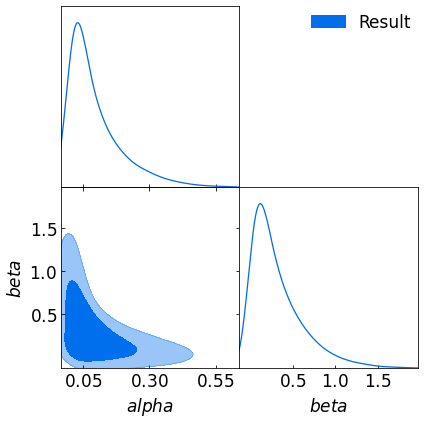

In [27]:
LMapsampler.param_chain( 100, 1 )
Mapcoeff = LMapsampler.param_fit_result()
alpha_result = Mapcoeff[0]
alpha = Mapcoeff[0][1]
beta_result = Mapcoeff[1]
beta = Mapcoeff[1][1]
print( alpha, beta)
LMapsampler.param_result_plot(  smooth=True, legend="Result" )

In [12]:
#namemap

In [13]:
#savedata( namemap+'.db', Mapsampler )

### FoV4 fitting

In [16]:
FF = Sfov4

#### Load Data

In [21]:
g_gssmap = SF4['gss'].flatten()
g_gssmap = F.whiten(g_gssmap)
g_gssmap = g_gssmap.astype(np.float32)
g_orimap = SF4['ori'].flatten()
g_orimap = g_orimap.astype(np.float32)

In [22]:
np.mean(g_gssmap)

-1.0556957e-08

In [23]:
F.checknan(g_gssmap)

False

In [24]:
np.mean(g_orimap)

15.671245

In [25]:
F.checknan(g_orimap)

False

#### Load Model

In [17]:
nc=30
nsteps=15000
nwalkers, ndim = 10, 2
param_len, param_num = 1, 2
np.random.seed(42)
initial_params_map = np.array([0.0599, 0.782]) + 1e-3 * np.random.randn(nwalkers, ndim)
param_lim_map = ( (0, 2), (0, 2) )

IP = True
namemap = FF.type_ + '_map_fitting_' + str( FF.nside ) + '_partial_' + str(FF.fov[0]) + '_center_' + str(FF.center[0]) + \
        str(FF.center[1]) + '_nstep' + str( nsteps ) + '_IP_' + str(IP) + '_lim' + str(param_lim_map[0][0]) + '_' + str(param_lim_map[0][1])

In [18]:
fitting_map = FitfuncDev( size=FF.fittingpatch.shape[0] )
combine = fitting_map.combine

In [19]:
#FFMapsampler = MCMC(nwalkers, nsteps, ndim, param_num, param_len, param_lim_map, initial_params_map, lim_=True, multi_=True, thread_num=nc, param_names=['alpha','beta'], vars_list=[combine])
#FFMapsampler.run_MCMC()

In [20]:
LFFMapsampler = loaddata('Sky_44_23/'+namemap+'.db')

0.010809740051627159


0.03639961622243181 0.2608151388800715
Removed no burn in


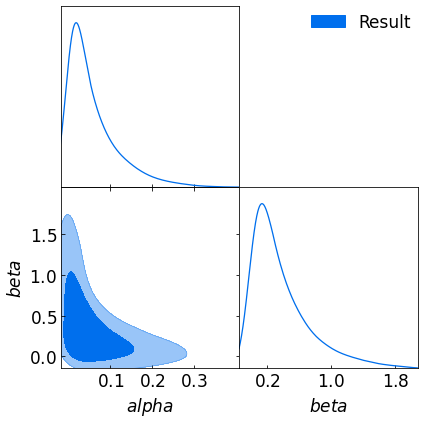

In [25]:
LFFMapsampler.param_chain( 1000, 1 )
FFMapcoeff = LFFMapsampler.param_fit_result()
alpha_result = FFMapcoeff[0]
alpha = FFMapcoeff[0][1]
beta_result = FFMapcoeff[1]
beta = FFMapcoeff[1][1]
print( alpha, beta)
LFFMapsampler.param_result_plot( smooth=True, legend="Result" )

In [22]:
LFFMapsampler.nsteps

15000

In [23]:
#namemap

In [24]:
#savedata( namemap+'.db', FFMapsampler )